# Nuclear energy - the future, or a danger to society

Nuclear energy has been on the rise in the current decade, as there has been a growing interest in a more sustainable energy source. This is due to the fact that nuclear energy's ability to generate large amounts of energy with a minimal carbon footprint. However, it is still quite a controversial form of power generation.

Due to historical accidents, such as Chernobyl, concerns over radioactive waste management and other issues, public opinion has become divided on whether nuclear energy should be used as a primary energy source. It could be seen as a powerful source of clean energy but also as one with potential safety risks.

In a time with increasing demand for global energy and urgent climate goals, nuclear energy is gaining attention again as a possible solution to the problems. Our data story aims to explore and show the two sides of nuclear energy and to demonstrate that nuclear energy could be the start of a cleaner power generation, while also showing the challenges of receiving the energy.


## Perspective 1
In our first perspective we look at the low environmental impact of nuclear energy and its low costs in comparison with other energy sources.
- Argument 1.1 Nuclear energy is a clean and efficient energy source. 
Nuclear energy can play a large role in fighting climate change because of its minimal co2 emission and low environmental impact among other factors. While still producing large amounts of energy.

- Argument 1.2 Nuclear energy is cheap
In addition, nuclear energy is cheap in comparison to other energy sources. Nuclear power plants have high construction costs however their operating costs are relatively low and can result in long-term cost-effectiveness.

## Perspective 2
In our second perspective we look at how Nuclear energy can be harmful to humans and the environment.
- Argument 2.1 Nuclear energy is a safety hazard and could harm humans
Nuclear energy plants can be very dangerous, especially when accidents happen. These accidents can cause the release of radioactive materials into the environment. This can cause a lot of danger to humans, like causing illnesses such as cancer. 

- Argument 2.2 Nuclear energy plants produce a lot of nuclear waste
When making nuclear energy nuclear waste is a byproduct. This nuclear waste is highly radioactive and hard to discard. Because of its radioactivity it can cause harm to humans and the environment. 


In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots

In [19]:
df = pd.read_csv('nuclear_data/impacts-of-energy-sources.csv')

df = df.drop(['Agricultural land use', 'Urban land use', 'Death rates', 'Year'], axis=1)

df = df.rename(columns={'Greenhouse gas emissions': 'Greenhouse gas emissions (kg CO2 eq.)', 
                        'Freshwater eutrophication': 'Freshwater eutrophication (kg P eq.)', 
                        'Ionising radiation':'Ionising radiation (kBq 235U eq)', 
                        'Water use':'Water use (m3)',
                        'Metal and mineral requirements':'Metal and mineral requirements (kg Sb eq.)',
                        'Non-carcinogenic toxicity':'Non-carcinogenic toxicity (CTUh)',
                        'Carcinogenic toxicity':'Carcinogenic toxicity (CTUh)',
                        'Total land use':'Total land use (points)',
                        'Uranium':'Uranium (kg Sb eq.)'})

df['Entity'] = df['Entity'].replace('Coal with carbon capture (CCS)', 'Coal')

df['Entity'] = df['Entity'].replace('Concentrating solar (tower)', 'Concentrating Solar')
df['Entity'] = df['Entity'].replace('Concentrating solar (trough)', 'Concentrating Solar')

df['Entity'] = df['Entity'].replace('Solar PV, cadmium (roof)', 'Solar PV')
df['Entity'] = df['Entity'].replace('Solar PV, cadmium (on-ground)', 'Solar PV')
df['Entity'] = df['Entity'].replace('Solar PV, silicon (on-ground)', 'Solar PV')
df['Entity'] = df['Entity'].replace('Solar PV, silicon (roof)', 'Solar PV')

df['Entity'] = df['Entity'].replace('Gas with carbon capture (CCS)', 'Gas')

df['Entity'] = df['Entity'].replace('Offshore wind', 'Wind')
df['Entity'] = df['Entity'].replace('Onshore wind', 'Wind')

df_combined = df.drop(columns=['Aluminium', 'Chromium', 'Cobalt', 'Copper', 'Manganese', 'Molybdenum', 'Nickel', 'Silicon', 'Zinc'])
df_combined['Human toxicity (CTUh)'] = df_combined['Non-carcinogenic toxicity (CTUh)'] + df_combined['Carcinogenic toxicity (CTUh)']
df_combined = df_combined.drop(columns=['Non-carcinogenic toxicity (CTUh)', 'Carcinogenic toxicity (CTUh)'])
df_combined = df_combined[['Entity', 'Greenhouse gas emissions (kg CO2 eq.)', 
                           'Freshwater eutrophication (kg P eq.)', 
                           'Ionising radiation (kBq 235U eq)', 
                           'Water use (m3)', 
                           'Total land use (points)', 
                           'Human toxicity (CTUh)', 
                           'Metal and mineral requirements (kg Sb eq.)', 
                           'Uranium (kg Sb eq.)']]

df_combined = df_combined.groupby('Entity', as_index=False).sum()

In [20]:
color_map = {
    'Coal': '#636EFA',
    'Concentrating Solar': '#EF553B',
    'Gas': '#00CC96',
    'Hydropower': '#AB63FA',
    'Nuclear': '#FFA15A',
    'Solar PV': '#19D3F3',
    'Wind': '#FF6692'
}

metrics6 = df_combined.columns[1:]
fig11 = make_subplots(
    rows=3, 
    cols=3,
    subplot_titles=metrics6,
    horizontal_spacing=0.15,
    vertical_spacing=0.2
)

for i, metric in enumerate(metrics6, 1):
    row = (i-1) // 3 + 1
    col = (i-1) % 3 + 1
    
    for entity in df_combined['Entity']:
        fig11.add_trace(
            go.Bar(
                x=[entity],
                y=df_combined[df_combined['Entity']==entity][metric],
                name=entity,
                marker_color=color_map[entity],
                showlegend=(i == 1)
            ),
            row=row,
            col=col
        )

fig11.update_layout(
    title_text='Energy Source Environmental Impact Comparison',
    height=1300,
    width=1200,
    legend_title_text='Energy Source'
)

fig11.update_yaxes(type="log", row=3, col=3) 

fig11.show()

In the figure ‘Energy Source Environmental Impact Comparison’, various energy sources are evaluated across multiple graphs, each representing a specific category of environmental impact.
Energy production can have a large impact on the environment. These graphs show that nuclear energy is better for the environment in many ways.

The graph ‘Greenhouse gas emission (kg CO2 eq.)’ shows the impact on the environment by greenhouse gas emission per energy source. The emission of greenhouse gasses such as CO2 contributes highly to global warming (Houghton, J., 2005). When greenhouse gasses are released into the atmosphere it can trap heat and warm the planet. This leads to climate related impacts such as rising temperatures, extreme weather events and sea level rising. In the graph it shows that nuclear energy has the least amount of greenhouse gas emission and thus has the lowest impact on the environment in this field compared to the other energy sources.

The second graph shows the excessive nutrients in water due to each energy source. Excessive nutrients in water have a high impact on the environment because it causes ecological imbalances (Wang, M., et al., 2019). Water with a high concentration of nutrients can lead to eutrophication, this causes harmful algal blooms and oxygen depletion, which is a harm to aquatic life. Nuclear energy causes the least amount of excessive nutrients in water compared with the other energy sources, making it have the least environmental impact in this field. 

In the third graph the amount of ionising radiation per energy source is shown. High-energy radiation can cause potential health and environmental risks. Ionizing radiation can damage DNA in cells. This can lead to cellular malfunction, mutations, and cause illnesses like cancer (Dartnell, L. R., 2011). These damages can kill organisms immediately or cause long-term health problems and reduced reproductive success. Populations decrease and biodiversity reduces, impacting the environment. The amount of ionising radiation by nuclear energy is the second most of all energy sources making it one the most impactful energy sources in this field.

The fourth graph shows water usage per energy source. When a lot of water is used it can have a big impact on the environment especially in urban environments and locations that deal with a lot of drought and water scarcity (Liu, J., et al., 2017). Nuclear energy uses the second highest amount of water however it uses less than half as much as the highest energy source ‘Coal’.

The fifth graph shows the amount of land use per energy source. Consider urban development and infrastructure or land devoted to production activities. These types of land use impacts the environment by disrupting the structure and function of natural ecosystems, leading to habitat loss, causes long-term ecological imbalance and reduces biodiversity (National Research Council, 2005). The graph shows that nuclear energy uses substantially less land compared to the other energy sources, having the second to last environmental impact in this field.

The sixth graph shows the human toxicity of each energy resource. Toxicity stands for the harmful effects on human health, like cancer or other illnesses. Again nuclear energy causes the least amount of toxicity.

In the seventh graph the use of minerals and metals per energy source is shown. Energy sources use metals and minerals in industrial processes, these metals and minerals are extracted by mining activities which can lead to habitat destruction, polluting of water sources and the release of harmful substances into the environment (Bron). The processing of metals also requires energy and water, further worsening these impacts. The graph shows that nuclear energy has the least amount of minerals and metals used and thus having the least amount of impact on the environment.

In the last graph the use of uranium is shown. Uranium is a radioactive element that has a lot of environmental impact. The mining and processing of this element can have long-lasting environmental impacts, primarily due to its radioactive and toxic nature (Rankin, W. J., 2011). These impacts include water and soil contamination, potential health risks, and disruptions to ecosystems. Nuclear energy uses the most amount of uranium compared to the other energy sources.

In one graph nuclear energy has the highest impact on the environment, in two graphs nuclear energy scores the second highest of which one of them is still less than half as much as the highest scoring energy source. However, in the remaining four graphs it is shown that nuclear energy has the least or second least amount of impact. Looking at all these graphs it shows that nuclear energy has significantly less environmental impacts in most of the topics


## CO2 emissions and nuclear energy productions

The following section ties into perspective 1 and looks into the C02 emissions, and amount of nuclear energy produced.

World CO2 Emissions 2023 - Interactive Visualization
This interactive world map visualizes CO2 emissions (in million tons) by country in 2023, with color intensity representing emission levels. Hovering over a country reveals additional details like population, GDP, life expectancy, and population density. The map helps compare environmental impact across nations while highlighting economic and demographic factors.

In [21]:

df = pd.read_csv('nuclear_data/world-data-2023.csv')

numeric_cols = ['Density\n(P/Km2)', 'Population', 'Co2-Emissions', 'GDP']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)

df['Population (millions)'] = df['Population'] / 1_000_000
df['GDP (trillions)'] = df['GDP'] / 1_000_000_000_000
df['Co2-Emissions (million tons)'] = df['Co2-Emissions'] / 1_000_000

fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Co2-Emissions (million tons)",
                    hover_name="Country",
                    hover_data={
                        "Country": False,
                        "Capital/Major City": True,
                        "Population (millions)": ":.2f million",
                        "GDP (trillions)": ":.2f trillion",
                        "Co2-Emissions (million tons)": ":.2f million tons",
                        "Life expectancy": ":.1f years",
                        "Density\n(P/Km2)": ":.1f people/km²"
                    },
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World CO2 Emissions 2023 - Interactive Visualization",
                    labels={'Co2-Emissions (million tons)': 'CO2 Emissions (million tons)'})

fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Capital: %{customdata[0]}<br>" +
                  "Population: %{customdata[1]}<br>" +
                  "GDP: %{customdata[2]}<br>" +
                  "CO2 Emissions: %{customdata[3]}<br>" +
                  "Life Expectancy: %{customdata[4]}<br>" +
                  "Density: %{customdata[5]}<extra></extra>"
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title="CO2 Emissions (million tons)",
        thickness=15,
        len=0.75
    )
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    selector=dict(type='choropleth')
)

fig.show()

Total nuclear electricity per country- Interactive Visualization
This interactive world map visualizes total nuclear electricity production (in TWh) by country, with darker colors indicating higher output. Countries with no nuclear power appear in black, and the countries that appear in white have no data regarding their nuclear production, while others are colored on a scale based on their production levels. Hovering over a country reveals its name and exact nuclear electricity generation data.

In [22]:

df = pd.read_csv('nuclear_data/global-data-on-sustainable-energy (1).csv')
aggregated_df = df.groupby('Entity').agg({
    'Year': ['min', 'max'],
    'Access to electricity (% of population)': 'mean',
    'Access to clean fuels for cooking': 'mean',
    'Renewable-electricity-generating-capacity-per-capita': 'mean',
    'Financial flows to developing countries (US $)': 'sum',
    'Renewable energy share in the total final energy consumption (%)': 'mean',
    'Electricity from fossil fuels (TWh)': 'sum',
    'Electricity from nuclear (TWh)': 'sum',
    'Electricity from renewables (TWh)': 'sum',
    'Low-carbon electricity (% electricity)': 'mean',
    'Primary energy consumption per capita (kWh/person)': 'mean',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'mean',
    'Value_co2_emissions_kt_by_country': 'sum',
    'Renewables (% equivalent primary energy)': 'mean',
    'gdp_growth': 'mean',
    'gdp_per_capita': 'mean',
    'Latitude': 'first',
    'Longitude': 'first'
})

aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

aggregated_df = aggregated_df.reset_index()

aggregated_df = aggregated_df.rename(columns={
    'Year_min': 'First_Year',
    'Year_max': 'Last_Year',
    'Access to electricity (% of population)_mean': 'Avg_Electricity_Access',
    'Access to clean fuels for cooking_mean': 'Avg_Clean_Cooking_Access',
    'Renewable-electricity-generating-capacity-per-capita_mean': 'Avg_Renewable_Capacity_per_Capita',
    'Financial flows to developing countries (US $)_sum': 'Total_Financial_Flows',
    'Renewable energy share in the total final energy consumption (%)_mean': 'Avg_Renewable_Share',
    'Electricity from fossil fuels (TWh)_sum': 'Total_Fossil_Electricity',
    'Electricity from nuclear (TWh)_sum': 'Total_Nuclear_Electricity',
    'Electricity from renewables (TWh)_sum': 'Total_Renewable_Electricity',
    'Low-carbon electricity (% electricity)_mean': 'Avg_Low_Carbon_Electricity',
    'Primary energy consumption per capita (kWh/person)_mean': 'Avg_Energy_Consumption_per_Capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)_mean': 'Avg_Energy_Intensity',
    'Value_co2_emissions_kt_by_country_sum': 'Total_CO2_Emissions',
    'Renewables (% equivalent primary energy)_mean': 'Avg_Renewables_Primary_Energy',
    'gdp_growth_mean': 'Avg_GDP_Growth',
    'gdp_per_capita_mean': 'Avg_GDP_per_Capita',
    'Land Area(Km2)_first': 'Land_Area',
    'Latitude_first': 'Latitude',
    'Longitude_first': 'Longitude'
})
custom_scale = [[0, 'black'], [0.0001, px.colors.sequential.Plasma[0]],
                [1, px.colors.sequential.Plasma[-1]]]

fig = px.choropleth(aggregated_df,
                    locations="Entity",
                    locationmode="country names",
                    color="Total_Nuclear_Electricity",
                    hover_name="Entity",
                    color_continuous_scale=custom_scale,
                    title="Total nuclear electricity per country- Interactive Visualization",
                    labels={'Total_Nuclear_Electricity':'Total nuclear electricity'},
                    range_color=(0, aggregated_df['Total_Nuclear_Electricity'].max()))

fig.update_layout(coloraxis=dict(cmin=0))

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title="Total nuclear electricity",
        thickness=15,
        len=0.75
    )
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    selector=dict(type='choropleth')
)

fig.show()

In [23]:

df = pd.read_csv('nuclear_data/global-data-on-sustainable-energy (1).csv')
aggregated_df['Total_Nuclear_Electricity'] = aggregated_df['Total_Nuclear_Electricity']


fig = px.choropleth(aggregated_df,
                    locations="Entity",
                    locationmode="country names",
                    color="Total_Nuclear_Electricity",
                    hover_name="Entity",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total nuclear electricity - Interactive Visualization",
                    labels={'Total nuclear electricity':'Total nuclear electricity'})

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title="Total nuclear electricity",
        thickness=15,
        len=0.75
    )
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    selector=dict(type='choropleth')
)

fig.show()

Global Energy Consumption by Source (1973-2022)
This stacked area chart visualizes global energy consumption trends (1973-2022), showing the yearly breakdown between fossil fuels (red), nuclear (blue), and renewables (green). The dotted black line tracks total primary energy consumption, allowing comparison between individual sources and overall demand. Hovering reveals exact values, highlighting how fossil fuels dominate but renewables are gradually growing over time.

In [24]:

df = pd.read_csv('nuclear_data/World Energy Overview.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

yearly_df = df.groupby('Year').agg({
    'Total Fossil Fuels Consumption': 'sum',
    'Nuclear Electric Power Consumption': 'sum',
    'Total Renewable Energy Consumption': 'sum',
    'Total Primary Energy Consumption': 'sum'
}).reset_index()

fig = px.area(
    yearly_df,
    x='Year',
    y=['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption', 'Total Renewable Energy Consumption'],
    title='Global Energy Consumption by Source (1973-2022)',
    labels={
        'value': 'Energy Consumption (quadrillion BTU)',
        'Year': 'Year',
        'variable': 'Energy Source'
    },
    color_discrete_map={
        'Total Fossil Fuels Consumption': '#E45756',
        'Nuclear Electric Power Consumption': '#4C78A8',
        'Total Renewable Energy Consumption': '#54A24B'
    }
)

fig.update_layout(
    hovermode='x unified',
    yaxis=dict(title='Energy Consumption (quadrillion BTU)'),
    legend=dict(
        title='Energy Source',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>' +
                  'Year: %{x}<br>' +
                  'Consumption: %{y:,.1f} quadrillion BTU<br>' +
                  '<extra></extra>'
)

fig.add_scatter(
    x=yearly_df['Year'],
    y=yearly_df['Total Primary Energy Consumption'],
    name='Total Consumption',
    line=dict(color='black', width=2, dash='dot'),
    hovertemplate='<b>Total Consumption</b><br>' +
                  'Year: %{x}<br>' +
                  'Total: %{y:,.1f} quadrillion BTU<br>' +
                  '<extra></extra>'
)

fig.show()

## Nuclear incidents worldwide

This section focuses on nuclear incidents worldwide. This ties into perspective 2.

Nuclear Incidents Worldwide
This map displays global nuclear incidents, with each red marker representing a specific event (e.g., accidents, leaks, or disasters). Hovering over a marker reveals details like the incident name, location, date, casualties, and INES severity level. The visualization helps identify high-risk areas and compare the scale of different nuclear incidents worldwide.

In [25]:

df = pd.read_csv("nuclear_data/Nuclear Incidents - Sheet3.csv")

df.columns = df.columns.str.strip()

df.columns.values[6] = "INES level"

df['Numbers of Direct Deaths'] = df['Numbers of Direct Deaths'].replace('', pd.NA).fillna('Unknown')
df['Numbers of InDirect Deaths'] = df['Numbers of InDirect Deaths'].replace('', pd.NA).fillna('Unknown')
df['INES level'] = df['INES level'].replace('', pd.NA).fillna('Unknown')

df['hover_text'] = (
    "<b>Incident:</b> " + df['Incident'] + "<br>" +
    "<b>Location:</b> " + df['Location'] + "<br>" +
    "<b>Date:</b> " + df['Date'] + "<br>" +
    "<b>Direct Deaths:</b> " + df['Numbers of Direct Deaths'].astype(str) + "<br>" +
    "<b>Indirect Deaths:</b> " + df['Numbers of InDirect Deaths'].astype(str) + "<br>" +
    "<b>Category:</b> " + df['Category'] + "<br>" +
    "<b>INES Level:</b> " + df['INES level'].astype(str) + "<br>" +
    "<b>Latitude:</b> " + df['Latitude'].astype(str) + "<br>" +
    "<b>Longitude:</b> " + df['Longitude'].astype(str)
)

fig = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Incident',
                     hover_data={'Latitude': False, 'Longitude': False},
                     custom_data=['hover_text'],
                     color_discrete_sequence=['red'],
                     title='Nuclear Incidents Worldwide')

fig.update_traces(hovertemplate="%{customdata[0]}<extra></extra>",
                  marker=dict(size=10))

fig.update_geos(projection_type="natural earth",
                showcountries=True,
                countrycolor="Black",
                showocean=True,
                oceancolor="LightBlue")

fig.update_layout(height=600, margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

We see that a lot of incidents have occured worldwide. A lot of these incidents where from a while back (40+ years). This implies that safety regulations have gotten better over time. However, the risk of nuclear incidents is still very serious.

## Nuclear energy death-rate

In this section we analyse the total death-rate of different energy sources. This section ties into perspective 2. Consider the following bar graph:

In [26]:
deaths_df = pd.read_csv('nuclear_data/rates_death_from_energy_production_per_twh.csv')
deaths_df = deaths_df.sort_values(by='Deaths per TWh of electricity production', ascending=False)
deaths_df.head()

,Entity,Deaths per TWh of electricity production,Year
1,Brown coal,32.720,2021
2,Coal,24.620,2021
6,Oil,18.430,2021
0,Biomass,4.630,2021
3,Gas,2.821,2021


In [27]:
fig = px.bar(
    deaths_df,
    x='Entity',
    y='Deaths per TWh of electricity production',
    color='Deaths per TWh of electricity production',
    color_continuous_scale='RdYlGn_r'  # correcte naam
)

fig.update_layout(
    title="Death-rate per TWh produced per energy source",
    xaxis_title="Energy production method",
    yaxis_title="Deaths per TWh",
    coloraxis_showscale=False,
)

fig.show()

We see that the death rate for nuclear (and also wind and solar) energy is gigantically smaller than that of fossil fuels. This could be because the work safety regulations are far worse for fossil fuels. This means that overal nuclear energy is far saver than fossil fuels.

## Nuclear Waste

An important aspect of nuclear energy is nuclear waste. Nuclear reactors produce highly radioactive waste that needs to be stored for decades on end. In this section we will focus on radioactive waste and how the creation of radioactive waste is increasing. The data in this section is from the **U.S. Energy Information Administration**. This means that this section does not represent the whole globe but only the **U.S.**.

This section is linked to perspective 2.

### Average Burnup

The 'burnup' of a nuclear reactor is a term for the efficiency of a reactor in GigaWatt days per metric ton of uranium (GWd / MTU). The first graph shows the average burnup of powerplants in the U.S. through time.

In [28]:
# data from https://www.eia.gov/nuclear/spent_fuel/ussnftab3.php
waste_df = pd.read_csv('nuclear_data/nuclear_spent_fuel.csv')

In [29]:
# calulate average burnup per year
waste_df['total_average_burnup'] = (
    (
        (waste_df['bwr_average_burnup'] * waste_df['bwr_tons_uranium']) +
        (waste_df['pwr_average_burnup'] * waste_df['pwr_tons_uranium'])
    ) /
    (waste_df['bwr_tons_uranium'] + waste_df['pwr_tons_uranium'])
)

In [30]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=waste_df['year'],
        y=waste_df['bwr_average_burnup'],
        name='Boiling water reactor',
        mode='lines+markers',
        line=dict(
            color="#7fc97f"
        ),
    )
)

fig.add_trace(
    go.Scatter(
        x=waste_df['year'],
        y=waste_df['pwr_average_burnup'],
        name='Presurised water reactor',
        mode='lines+markers',
        line=dict(
            color="#fdc086"
        ),
    )
)

fig.add_trace(
    go.Scatter(
        x=waste_df['year'],
        y=waste_df['total_average_burnup'],
        name='Total',
        mode='lines+markers',
        line=dict(
            color="#beaed4"
        ),
    )
)

fig.update_layout(
    title="Average Burnup per reactor method",
    xaxis_title="Year",
    yaxis_title="Burnup (GWd/MTU)",
)

fig.show()

We see that the efficiency of the reactors increases from the 1970s tot the mid 2000s. In the mid 2000s however, the efficiency seems to plateu around 45 GWd/MTU

### Amount of Uranium consumed

The following two graphs show the amount of uranium used in the U.S. per year and the total amount of uranium in containment in the U.S.

In [31]:
fig = go.Figure(
    go.Scatter(
        x=waste_df['year'],
        y=waste_df['total_tons_uranium'],
        mode='lines+markers',
        line=dict(
            color="#298f0d"
        ),
    )
)

fig.update_layout(
    title="Tons of Uranium Used per Year",
    xaxis_title="Year",
    yaxis_title="MTU",
)

fig.show()

In [32]:

waste_values = waste_df['total_tons_uranium']
total_uranium = []
uranium_used = 0
for datapoint in waste_values:
    uranium_used += datapoint
    total_uranium.append(uranium_used)

waste_df['uranium_used'] = total_uranium

fig = go.Figure(
    go.Scatter(
        x=waste_df['year'],
        y=waste_df['uranium_used'],
        mode='lines+markers',
        line=dict(
            color="#298f0d"
        ),
    )
)

fig.update_layout(
    title="Tons of Uranium in Containment",
    xaxis_title="Year",
    yaxis_title="MTU",
)

fig.show()

We see that the amount of uranium that is used per year is not increasing in recent times, as nuclear energy is not expanding rapidly in the U.S. The amount of total nuclear waste is likely to keep increasing by around 45k MTU yearly.

As nuclear energy is not yet the most prevelant form of energy in the U.S. and as the amount of nuclear energy is already quite high, the creation and storage of nuclear waste remains a significant challange in the nuclear energy sector

## The Costs of Nuclear Energy

In this section we will look into the economic costs of nuclear energy relative to other forms of energy production. This ties into perspective 1.

The following charts show the average (LCOE) by energy source, which is the cost of energy production in dollars per MWh.

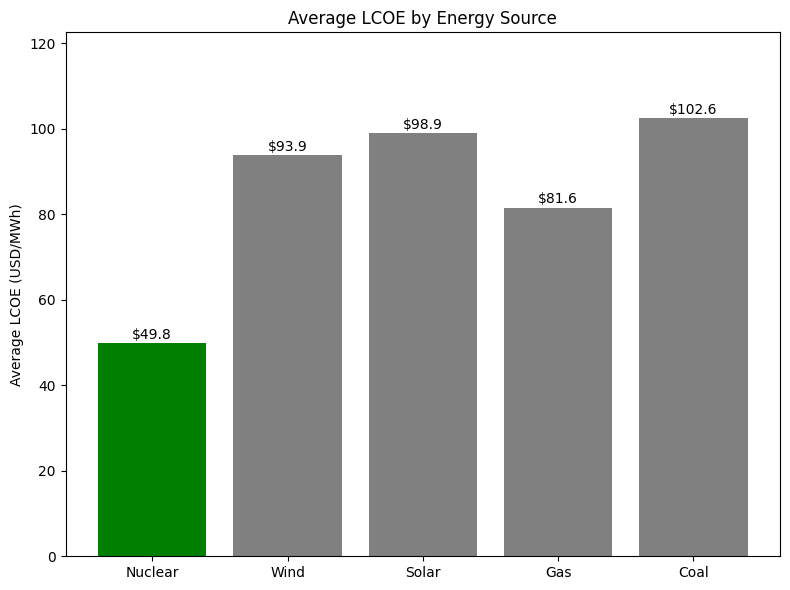

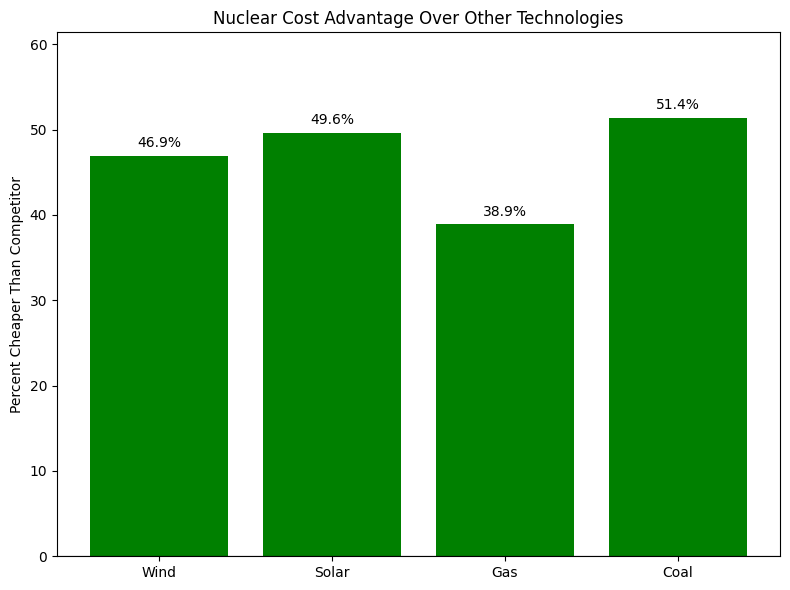

In [33]:
df = pd.read_csv("nuclear_data/levelised_cost_of_electricity.csv").drop(index=0)
df = df.rename(columns={
    'Capital costs': 'Capital',
    'O&M': 'OM',
    'Fuel (th)': 'Fuel_th',
    'Fuel (el)': 'Fuel_el',
    'Carbon': 'Carbon',
    'CHP heat revenues': 'CHP_revenue',
    'LCOE': 'LCOE',
    'Category': 'Category',
    'Country': 'Country'
})
df[['LCOE']] = df[['LCOE']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Category', 'LCOE'])

nuclear = df[df['Category'] == 'Nuclear']
nuclear_mean = nuclear['LCOE'].mean()

competitors = ['Wind', 'Solar', 'Gas', 'Coal']
comp_means = {}
savings = {}

for comp in competitors:
    mean = df[df['Category'] == comp]['LCOE'].mean()
    comp_means[comp] = mean
    savings[comp] = ((mean - nuclear_mean) / mean) * 100

labels = ['Nuclear'] + competitors
values = [nuclear_mean] + [comp_means[c] for c in competitors]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['green'] + ['gray']*len(competitors))
plt.ylabel("Average LCOE (USD/MWh)")
plt.title("Average LCOE by Energy Source")
plt.grid(False)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"${yval:.1f}", ha='center')
plt.ylim(0, max(values) + 20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
bars2 = plt.bar(savings.keys(), savings.values(), color='green')
plt.ylabel("Percent Cheaper Than Competitor")
plt.title("Nuclear Cost Advantage Over Other Technologies")
plt.grid(False)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center')
plt.ylim(0, max(savings.values()) + 10)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7052/4028945921.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




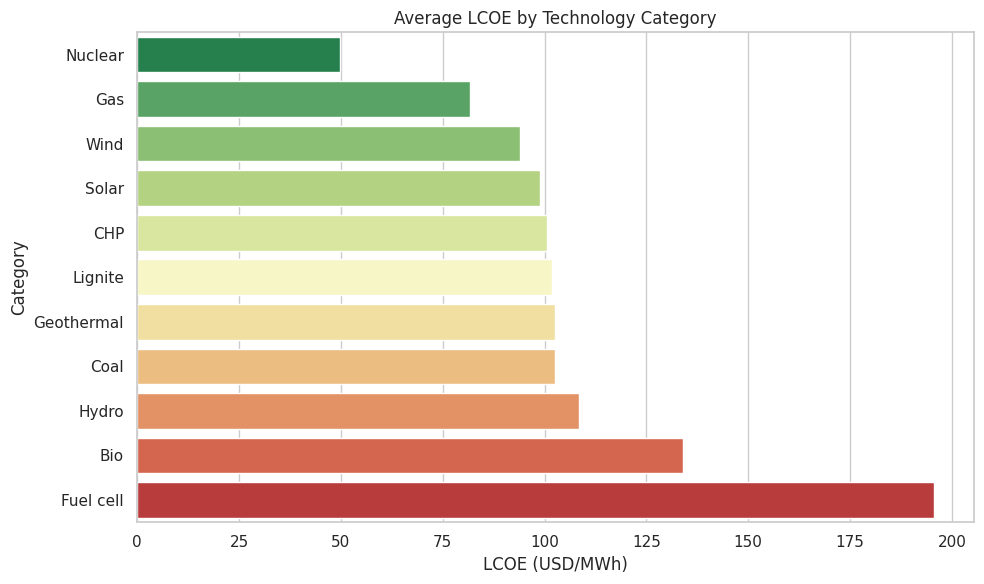

In [34]:
df = pd.read_csv("nuclear_data/levelised_cost_of_electricity.csv").drop(index=0)

df = df.rename(columns={
    'Capital costs': 'Capital',
    'O&M': 'OM',
    'Fuel (th)': 'Fuel_th',
    'Fuel (el)': 'Fuel_el',
    'Carbon': 'Carbon',
    'CHP heat revenues': 'CHP_revenue',
    'LCOE': 'LCOE',
    'Category': 'Category',
    'Country': 'Country'
})

cols = ['Capital', 'OM', 'Fuel_th', 'Fuel_el', 'Carbon', 'CHP_revenue', 'LCOE']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=['Category', 'LCOE'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
avg_lcoe = df.groupby('Category')['LCOE'].mean().sort_values()

n_colors = len(avg_lcoe)
palette = sns.color_palette("RdYlGn_r", n_colors) 

sns.barplot(x=avg_lcoe.values, y=avg_lcoe.index, palette=palette)
plt.title("Average LCOE by Technology Category")
plt.xlabel("LCOE (USD/MWh)")
plt.tight_layout()
plt.show()

We see that nuclear energy is by far the cheapest form of electricity and has a significant advantage over all other forms of energy production. This means that it is an econimically viable alternative to fossil fuels.